# Part 1 — K-Means from Scratch (NumPy only)
- KMeans++ and Random init
- Convergence criteria
- Inertia history

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
os.chdir("..")
sys.path.append(os.getcwd())

from src.utils.random import set_seed
from src.utils.preprocessing import StandardScaler


In [8]:
import os
os.chdir('..')
import sys
sys.path.append('.')
from src.clustering.kmeans import KMeans
from src.metrics.internal import silhouette_score


In [9]:
# Data loading (Breast Cancer Wisconsin Diagnostic)
# We avoid sklearn for loading; we use pandas to read the UCI dataset.
# If you're offline, download the CSV once and set LOCAL_CSV path.

UCI_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
LOCAL_CSV = None  # e.g. "data/wdbc.data"

cols = ["id", "diagnosis"] + [f"f{i}" for i in range(30)]
if LOCAL_CSV is None:
    df = pd.read_csv(UCI_URL, header=None, names=cols)
else:
    df = pd.read_csv(LOCAL_CSV, header=None, names=cols)

y = (df["diagnosis"].values == "M").astype(int)  # Malignant=1, Benign=0 (used ONLY for evaluation)
X = df.drop(columns=["id","diagnosis"]).values.astype(float)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

print("X:", X.shape, "Xs:", Xs.shape, "Malignant%:", y.mean())


X: (569, 30) Xs: (569, 30) Malignant%: 0.37258347978910367


In [10]:
km_pp = KMeans(n_clusters=2, init="kmeans++", seed=42).fit(Xs)
km_rn = KMeans(n_clusters=2, init="random", seed=42).fit(Xs)

print("KMeans++ inertia:", km_pp.inertia_, "iters:", len(km_pp.inertia_history_), "sil:", silhouette_score(Xs, km_pp.labels_))
print("Random   inertia:", km_rn.inertia_, "iters:", len(km_rn.inertia_history_), "sil:", silhouette_score(Xs, km_rn.labels_))


KMeans++ inertia: 11595.683312822135 iters: 8 sil: 0.34473443465555664
Random   inertia: 11595.69648033479 iters: 6 sil: 0.3433822406852521


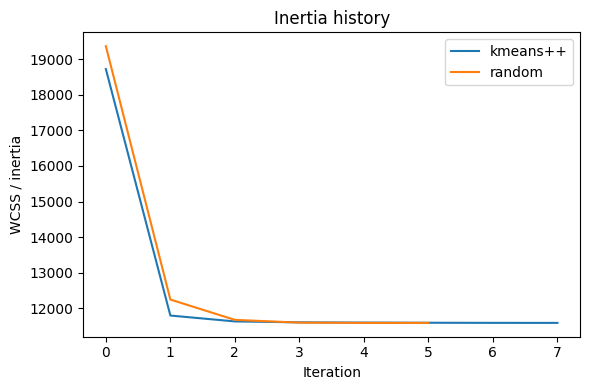

In [11]:
plt.figure(figsize=(6,4))
plt.plot(km_pp.inertia_history_, label="kmeans++")
plt.plot(km_rn.inertia_history_, label="random")
plt.title("Inertia history")
plt.xlabel("Iteration")
plt.ylabel("WCSS / inertia")
plt.legend()
plt.tight_layout()
plt.show()
